In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import joblib
import random


In [2]:
df = pd.read_csv("weather_data.csv")

In [3]:
df.head()

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT10
0,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2000-01-01,6.04,1403.0,1312.0,0.00,NaN,NaN,37.0,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2000-01-02,9.40,1503.0,1502.0,0.01,NaN,NaN,45.0,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2000-01-03,10.96,1644.0,1816.0,0.15,NaN,NaN,38.0,...,21.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2000-01-04,16.33,1055.0,1054.0,0.06,NaN,NaN,36.0,...,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2000-01-05,7.83,2317.0,2115.0,0.00,NaN,NaN,25.0,...,21.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  9412 non-null   object 
 1   NAME     9412 non-null   object 
 2   DATE     9412 non-null   object 
 3   AWND     9337 non-null   float64
 4   FMTM     2172 non-null   float64
 5   PGTM     9186 non-null   float64
 6   PRCP     9350 non-null   float64
 7   SNOW     1060 non-null   float64
 8   SNWD     1344 non-null   float64
 9   TAVG     2020 non-null   float64
 10  TMAX     9386 non-null   float64
 11  TMIN     9386 non-null   float64
 12  TSUN     1188 non-null   float64
 13  WDF2     9342 non-null   float64
 14  WDF5     9342 non-null   float64
 15  WESD     205 non-null    float64
 16  WSF2     9342 non-null   float64
 17  WSF5     9342 non-null   float64
 18  WT01     1960 non-null   float64
 19  WT02     224 non-null    float64
 20  WT03     373 non-null    float64
 21  WT04     9 non

In [5]:
df.isna().sum()

STATION       0
NAME          0
DATE          0
AWND         75
FMTM       7240
PGTM        226
PRCP         62
SNOW       8352
SNWD       8068
TAVG       7392
TMAX         26
TMIN         26
TSUN       8224
WDF2         70
WDF5         70
WESD       9207
WSF2         70
WSF5         70
WT01       7452
WT02       9188
WT03       9039
WT04       9403
WT05       9393
WT06       9409
WT08       8476
WT09       9398
WT10       9411
dtype: int64

In [6]:
df.describe()

,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT10
count,9337.000000,2172.000000,9186.000000,9350.000000,1060.000000,1344.000000,2020.000000,9386.000000,9386.000000,1188.0,...,9342.000000,1960.0,224.0,373.0,9.0,19.0,3.0,936.0,14.0,1.0
mean,8.130175,1436.031768,1356.744611,0.080006,0.193679,2.035342,48.435644,57.991157,40.201790,0.0,...,24.445108,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3.565156,536.993526,557.984199,0.216878,0.737225,3.437491,19.297220,20.827204,18.271894,0.0,...,8.496291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.0,...,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,5.590000,1212.000000,1117.250000,0.000000,0.000000,0.000000,33.000000,40.000000,27.000000,0.0,...,18.100000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,7.610000,1458.000000,1421.000000,0.000000,0.000000,0.000000,49.000000,60.000000,40.000000,0.0,...,23.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,10.290000,1731.250000,1657.000000,0.040000,0.000000,3.000000,65.000000,77.000000,56.000000,0.0,...,29.100000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,26.400000,2359.000000,2359.000000,3.490000,9.200000,18.000000,85.000000,100.000000,79.000000,0.0,...,161.100000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
# Check for missing values and data range
data_info = pd.DataFrame({
    'Null Values': df.isnull().sum(),
    'Percentage (%)': (df.isnull().sum() / len(df) * 100).round(2),
    'Min': df.min(numeric_only=True),
    'Max': df.max(numeric_only=True)
})
data_info

,Null Values,Percentage (%),Min,Max
AWND,75,0.80,0.0,26.40
DATE,0,0.00,NaN,NaN
FMTM,7240,76.92,0.0,2359.00
NAME,0,0.00,NaN,NaN
PGTM,226,2.40,0.0,2359.00
PRCP,62,0.66,0.0,3.49
SNOW,8352,88.74,0.0,9.20
SNWD,8068,85.72,0.0,18.00
STATION,0,0.00,NaN,NaN
TAVG,7392,78.54,0.0,85.00


In [8]:
# Data cleaning & preprocessing
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values('DATE')

# Fill Temperature gaps with interpolation (smooth transition)
df['TMAX'] = df['TMAX'].interpolate()
df['TMIN'] = df['TMIN'].interpolate()

# Fill PRCP and SNOW: In weather data, Null usually means 0 (no recorded rain/snow)
df['PRCP'] = df['PRCP'].fillna(0)
df['SNOW'] = df['SNOW'].fillna(0)

# Fill Wind: Use the median to avoid outlier bias
df['AWND'] = df['AWND'].fillna(df['AWND'].median())
df['WSF5'] = df['WSF5'].fillna(df['WSF5'].median())

# 3. Handle WT Columns: Convert NaN to 0 and 1.0 to 1
wt_cols = ['WT01', 'WT02', 'WT03', 'WT08'] # Only keep ones with enough data
for col in wt_cols:
    df[col] = df[col].fillna(0).astype(int)

# 4. Feature Engineering (Seasonality is key for 25-year data)
df['month'] = df['DATE'].dt.month
df['day_of_year'] = df['DATE'].dt.dayofyear
df['year'] = df['DATE'].dt.year # To capture climate trends

# Create rolling features (Memory of the last 3 days)
df['TMAX_3day_avg'] = df['TMAX'].rolling(window=3).mean()
df['PRCP_3day_sum'] = df['PRCP'].rolling(window=3).sum()

# 5. Create Target: Tomorrow's Max Temp
df['Target_TMAX'] = df['TMAX'].shift(-1)

# Drop the columns that are not needed
cols_to_drop = ['WT04', 'WT05', 'WT06', 'WT09', 'WT10', 'TSUN', 'WESD', 'FMTM', 'TAVG']
df_final = df.drop(columns=cols_to_drop).dropna()
df_final.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
       'WT08', 'month', 'day_of_year', 'year', 'TMAX_3day_avg',
       'PRCP_3day_sum', 'Target_TMAX'],
      dtype='object')

In [9]:

# Define Features
features = ['TMAX', 'TMIN', 'PRCP', 'AWND', 'WSF5', 'month', 'day_of_year', 'TMAX_3day_avg', 'WT01']
X = df_final[features]
y = df_final['Target_TMAX']



In [10]:
# Split: 80% Training, 20% Testing (Chronological)
split_idx = int(len(df_final) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("Ready for Algorithm training.")

Ready for Algorithm training.


In [11]:

# Initialize and Train the Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#  Make Predictions
lr_preds = lr_model.predict(X_test)

#  Calculate Performance Metrics
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

print(" Linear Regression Baseline Results")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}°F")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.2f}°F")
print(f"R² Score: {lr_r2:.4f}")

# Save the results 
baseline_mae = lr_mae

 Linear Regression Baseline Results
Mean Absolute Error (MAE): 4.98°F
Root Mean Squared Error (RMSE): 6.55°F
R² Score: 0.9140


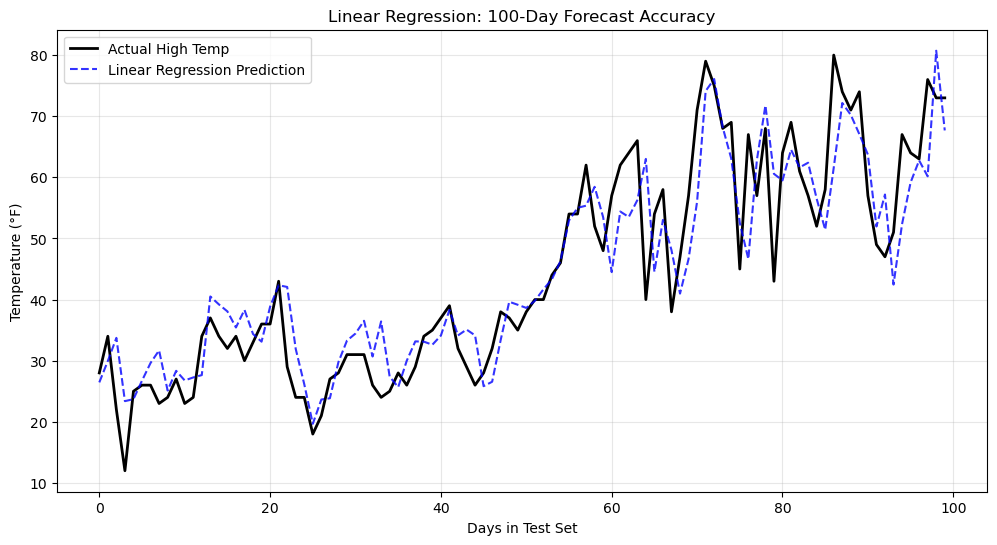

In [12]:
plt.figure(figsize=(12, 6))

# We will plot the first 100 days of the test set for clarity
plt.plot(y_test.values[:100], label='Actual High Temp', color='black', linewidth=2)
plt.plot(lr_preds[:100], label='Linear Regression Prediction', color='blue', linestyle='--', alpha=0.8)

plt.title("Linear Regression: 100-Day Forecast Accuracy")
plt.xlabel("Days in Test Set")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [13]:

# Random Forest
# We use 100 trees and limited depth to prevent overfitting the 25-year noise
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Make Predictions
rf_preds = rf_model.predict(X_test)

# 3. Calculate Performance Metrics
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(" Random Forest Results ")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}°F")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}°F")
print(f"R² Score: {rf_r2:.4f}")

# Compare with Baseline
improvement = lr_mae - rf_mae
print(f"\nImprovement over Linear Regression: {improvement:.2f}°F")

 Random Forest Results 
Mean Absolute Error (MAE): 4.87°F
Root Mean Squared Error (RMSE): 6.27°F
R² Score: 0.9213

Improvement over Linear Regression: 0.11°F


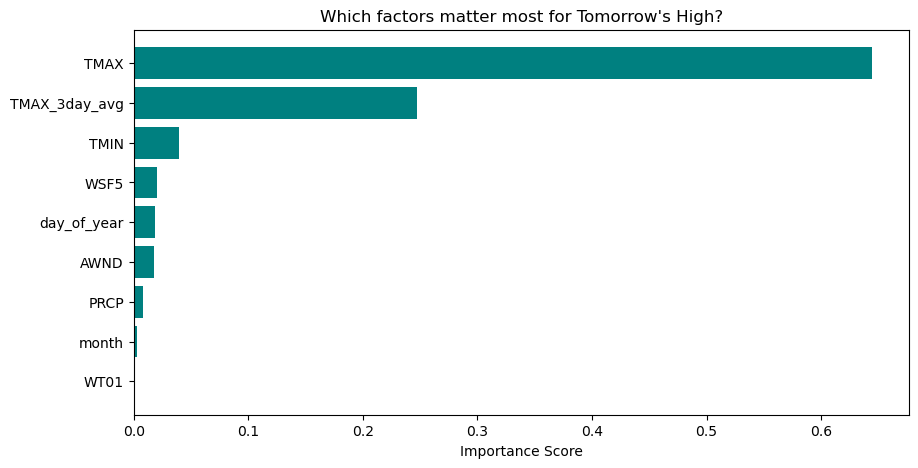

In [14]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel("Importance Score")
plt.title("Which factors matter most for Tomorrow's High?")
plt.gca().invert_yaxis()
plt.show()

In [15]:
# Gradient Boosting
# using similar hyperparameters to keep the comparison fair
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbm_model.fit(X_train, y_train)

# Make Predictions
gbm_preds = gbm_model.predict(X_test)

# Calculate Performance Metrics
gbm_mae = mean_absolute_error(y_test, gbm_preds)
gbm_r2 = r2_score(y_test, gbm_preds)
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_preds))

print(" Gradient Boosting Results ")
print(f"Mean Absolute Error (MAE): {gbm_mae:.2f}°F")
print(f"Root Mean Squared Error (RMSE): {gbm_rmse:.2f}°F")
print(f"R² Score: {gbm_r2:.4f}")

# Compare with the previous winner (Random Forest)
winner_diff = rf_mae - gbm_mae
print(f"\nImprovement over Random Forest: {winner_diff:.2f}°F")

 Gradient Boosting Results 
Mean Absolute Error (MAE): 4.95°F
Root Mean Squared Error (RMSE): 6.49°F
R² Score: 0.9156

Improvement over Random Forest: -0.08°F


In [16]:
# Create a summary table
results_data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE (°F)': [lr_mae, rf_mae, gbm_mae],
    'RMSE (°F)': [lr_rmse, rf_rmse, gbm_rmse],
    'R² Score': [lr_r2, rf_r2, gbm_r2]
}

leaderboard = pd.DataFrame(results_data)
print("\n FINAL ALGORITHM LEADERBOARD ")
print(leaderboard.sort_values(by='MAE (°F)').to_string(index=False))


 FINAL ALGORITHM LEADERBOARD 
            Model  MAE (°F)  RMSE (°F)  R² Score
    Random Forest  4.867951   6.267297  0.921278
Gradient Boosting  4.951250   6.489220  0.915604
Linear Regression  4.979213   6.549870  0.914019


In [18]:
# Dictionaries to hold ALL 3 types of models
weekly_temp_models = {}
weekly_rain_amt_models = {}  
weekly_rain_prob_models = {}


for day in range(1, 8):
    t_target = df_final['TMAX'].shift(-day)
    r_amt_target = df_final['PRCP'].shift(-day)  # How much rain?
    r_prob_target = (df_final['PRCP'].shift(-day) > 0.01).astype(int) # Will it rain?
    
    # Align Data (Drop NaNs)
    valid_idxs = t_target.dropna().index
    X_day = df_final.loc[valid_idxs, features]
    
    # --- Train Models ---
    
    #  Temperature
    t_mod = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    t_mod.fit(X_day, t_target.loc[valid_idxs])
    weekly_temp_models[day] = t_mod
    
    #  Rain Amount 
    ra_mod = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    ra_mod.fit(X_day, r_amt_target.loc[valid_idxs])
    weekly_rain_amt_models[day] = ra_mod
    
    # Rain Probability
    rp_mod = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    rp_mod.fit(X_day, r_prob_target.loc[valid_idxs])
    weekly_rain_prob_models[day] = rp_mod
    
    print(f"  ✅ Day {day} complete.")

# --- Save Everything Correctly ---
forecast_package = {
    'temp': weekly_temp_models,
    'rain_amt': weekly_rain_amt_models, 
    'rain_prob': weekly_rain_prob_models,
    'features': features
}

joblib.dump(forecast_package, 'pontiac_7day_rain_models.pkl')


  ✅ Day 1 complete.
  ✅ Day 2 complete.
  ✅ Day 3 complete.
  ✅ Day 4 complete.
  ✅ Day 5 complete.
  ✅ Day 6 complete.
  ✅ Day 7 complete.


['pontiac_7day_rain_models.pkl']

In [20]:
# Load the file we just created
pkg = joblib.load('pontiac_7day_rain_models.pkl')
models_t = pkg['temp']
models_rp = pkg['rain_prob']

# Pick 5 random days
random_indices = random.sample(list(X_test.index), 5)

print(f"{'Date':<12} | {'AI Temp':<10} | {'Real Temp':<10} | {'Rain Chance':<12} | {'Did it Rain?'}")
print("-" * 70)

for idx in random_indices:
    row = df_final.loc[[idx]]
    actual_temp = df_final.loc[idx, 'TMAX']
    actual_rain = df_final.loc[idx, 'PRCP']
    date_str = df_final.loc[idx, 'DATE'].strftime('%Y-%m-%d')
    
    # AI Prediction
    pred_temp = models_t[1].predict(row[features])[0]
    pred_prob = models_rp[1].predict_proba(row[features])[0][1]
    
    # Formatting
    rain_status = "YES 🌧️" if actual_rain > 0.01 else "No ☀️"
    
    print(f"{date_str} | {pred_temp:.1f}°F     | {actual_temp:.1f}°F     | {pred_prob:.0%}         | {rain_status}")

Date         | AI Temp    | Real Temp  | Rain Chance  | Did it Rain?
----------------------------------------------------------------------
2010-09-03 | 74.0°F     | 77.0°F     | 73%         | YES 🌧️
2010-05-24 | 82.5°F     | 83.0°F     | 15%         | No ☀️
2010-12-09 | 33.4°F     | 27.0°F     | 4%         | No ☀️
2010-03-23 | 52.0°F     | 54.0°F     | 74%         | No ☀️
2010-12-17 | 29.9°F     | 26.0°F     | 11%         | No ☀️
